# Problem 1 from  MS Case Study
### Rondell King

Background 
You work at a magic potato trading company. The company earns fees by storing potatoes for clients as well as finding buyers and sellers of potatoes on behalf of clients. The storage fees earned by the company are based off the total market value of the potatoes stored by the clients. These potatoes are magic- they do not spoil while in storage, they can be shrunk so they take up very little space, and the delivery of the potatoes does not incur any cost. Potatoes must be kept separate from each other and therefore the cost to store different potato types may differ. Storage rates will be determined by traders and based off of numerous factors.  
You work on the data science team and your role is to work with data to create reports, models, and make the business smarter and more efficient
Two parts 
Analyse the given sets of data and answer the questions below. Help the management team understand what is happening in the potato market and what client activity looks like. 
Create a web tool that helps capture and save potato prices seen in the market 
 
Part 1
Background
You are given the Data_Files excel sheet which contains information about potatoes, the company's clients, and a snapshot of client potato positions for a period of time. A quantity of Null represents no position. Management has some questions regarding these data and would like to know your interpretations. You will present your findings at the quarterly management meeting.

Questions 
* Which clients have the largest potato stockpile based on market value? 
* Which clients are the most active?
* Which potatoes are most activity traded?
* What client activity trends do you see?
* What potato price trends do you see?
* Are there any factors that can help predict potato prices? 
* Are there any factors that can help predict client activity? 
* Summarize what has happened during this period

# First Step is to load the excel sheets using Pandas. 
Examine the data and check for missing values in the tables.


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###
### LOAD AND SANITIZE DATA###
###

# Load xls sheets into dataframes
data_file = '2_Data_Files.xlsx'  # File must be in the same directory as this script

# Each sheet will be stored in the dict as a dataframe object
df_dict = pd.read_excel(data_file, sheetname=['Potatoes_Info', 'Client_Info', 'Potatoes_Positions'])
positions = df_dict.get('Potatoes_Positions')  # Trade data from 5/1/2020 to 8/31/2020. Key = Client ID
client_info = df_dict.get('Client_Info')  # Key = Client ID
potato_info = df_dict.get('Potatoes_Info')  # Ket = Product ID

# Merge the sheets into one dataframe object.
positions_merged = positions.merge(client_info, on='Client ID')
positions_merged = positions_merged.merge(potato_info, on='Product ID')

# Sanitize the Data by replacing [NULL] with 0 (A value of [NULL] represents no position)


print(positions_merged.isnull().sum())#213 prices are missing.

/anaconda3/lib/python3.7/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


Date                               0
Client ID                          0
Product ID                         0
Price                            213
Quantity                           0
First Name                         0
Last Name                          0
Client Type                        0
Client Location                    0
Variety Name                       0
Country                            0
Shape of tuber                     0
Colour of skin                     0
Colour of flesh                    0
Depth of eyes                      0
Smoothness of skin                 0
Colour of base of lightsprout      0
Maturity                           0
Height of plants                   0
Frequency of berries               0
dtype: int64


### Convert Null prices to 0

In [26]:
positions_merged['Quantity'].replace('[NULL]', 0, inplace=True)

# Which clients have the largest potato stockpile based on market value?

Top 3 Clients in terms of market value are:

1. Destiny
2. Jamel  
3. Samuel

I found the top market value by adding a new column to the dataframe.

Price X Quantity = Market Value

Sorting the table by Market value shows the clients with the highest Totals.

In [27]:
# Add new column for Market value => Price * Quantity. 
positions_merged['Market Value'] = positions_merged.Price * positions_merged.Quantity
positions_merged['Market Value'].fillna(0,inplace=True)

# Aggregate on client ID to find the clients with highest market value.
top_market_value = positions_merged.groupby(['Client ID',
                                             'First Name ',
                                              'Last Name'], as_index=False)['Market Value'].sum()
top_market_value = top_market_value[['Client ID','First Name ','Last Name', 'Market Value']].sort_values(by='Market Value',
                                                                      ascending=False)

print(top_market_value.to_string(formatters={'Market Value':'${:,.2f}'.format}))

    Client ID First Name     Last Name        Market Value
4          27     Destiny     Aldridge $227,333,258,486.22
7          38       Jamel       Caruso   $4,099,865,425.30
21         82      Samuel       Cheney     $381,338,437.50
18         74     Nakisha  Southerland     $253,565,363.06
5          30     Eulalia       Culver     $178,615,864.61
22         89     Tammera     Lassiter      $77,000,752.74
9          44      Jeremy         Kong      $68,287,532.35
13         50      Landon         Kyle      $47,785,223.01
23         94      Valeri   Burchfield      $47,421,539.53
0          17        Chan          Vue      $38,883,442.46
12         49     Kirstin       Browne      $34,918,354.53
14         52      Larita     Albright      $27,403,986.45
16         64      Mariko        Giles      $20,889,961.86
19         77    Rasheeda       Spivey      $16,789,133.46
20         78     Rashida      Proctor       $6,808,320.95
2          21       Chase        Woody       $1,765,570.

# Which clients are the most active?
Count how many times the client name is in the positions data. Get a count of unique values for First Name

Below are the are names of the 10 most active clients and their total trades during this period.

In [28]:
client_acitivty = positions_merged.groupby(['Client ID', 
                          'First Name ',
                          'Last Name'])['Date'].count()
client_acitivty.sort_values(ascending=False).head(10)

Client ID  First Name   Last Name  
38         Jamel        Caruso         10239
74         Nakisha      Southerland     3575
50         Landon       Kyle            2091
94         Valeri       Burchfield      1729
64         Mariko       Giles           1636
44         Jeremy       Kong            1629
27         Destiny      Aldridge        1202
17         Chan         Vue              961
89         Tammera      Lassiter         879
30         Eulalia      Culver           740
Name: Date, dtype: int64

# Which potatoes are most actively traded?
30 Most actively traded potatoes and their trade count.

In [29]:
potato_trade_activity = positions_merged.groupby(['Product ID', 
                          'Variety Name'])['Date'].count()
potato_trade_activity.sort_values(ascending=False).head(30)

Product ID  Variety Name  
16          Argos             724
172         Lorimer           682
45          British Queen     615
93          Edzell Blue       611
10          Amorosa           582
19          Arran Banner      548
281         Shepody           514
100         Emma              511
14          Anya              482
7           Ambassador        480
251         Rocket            474
2           Accord            471
28          Atlantic          461
57          Carnaval          422
102         Erntestolz        404
73          Colleen           401
98          Emblem            384
218         Pentland Dell     383
15          Apache            382
145         Jubilee           377
122         Gourmandine       372
36          Barna             358
217         Pentland Crown    354
278         Shannon           343
81          Cultra            339
17          Ariata            333
254         Roscor            319
23          Arrow             317
83          Desiree  

# What client activity trends do you see?

Client activity is the lowest during May and peaks in June.
Throughout August begins to taper out. Seasonality plays a role here, where it appears the market
for potatoes experiences peak activity during the summer season.

In August client activity is relatively low when compared to Jun and July but there is much less volatility in activty during August. Between May and July, trade volume swings are much more intense.

Highest trade activity count:404 occurs on 2020-06-12 

Lowest trade activity count:232 occurs on 2020-05-05

Highest trade activity count:404 occurs on 2020-06-12 00:00:00
Lowest trade activity count:232 occurs on 2020-05-05 00:00:00


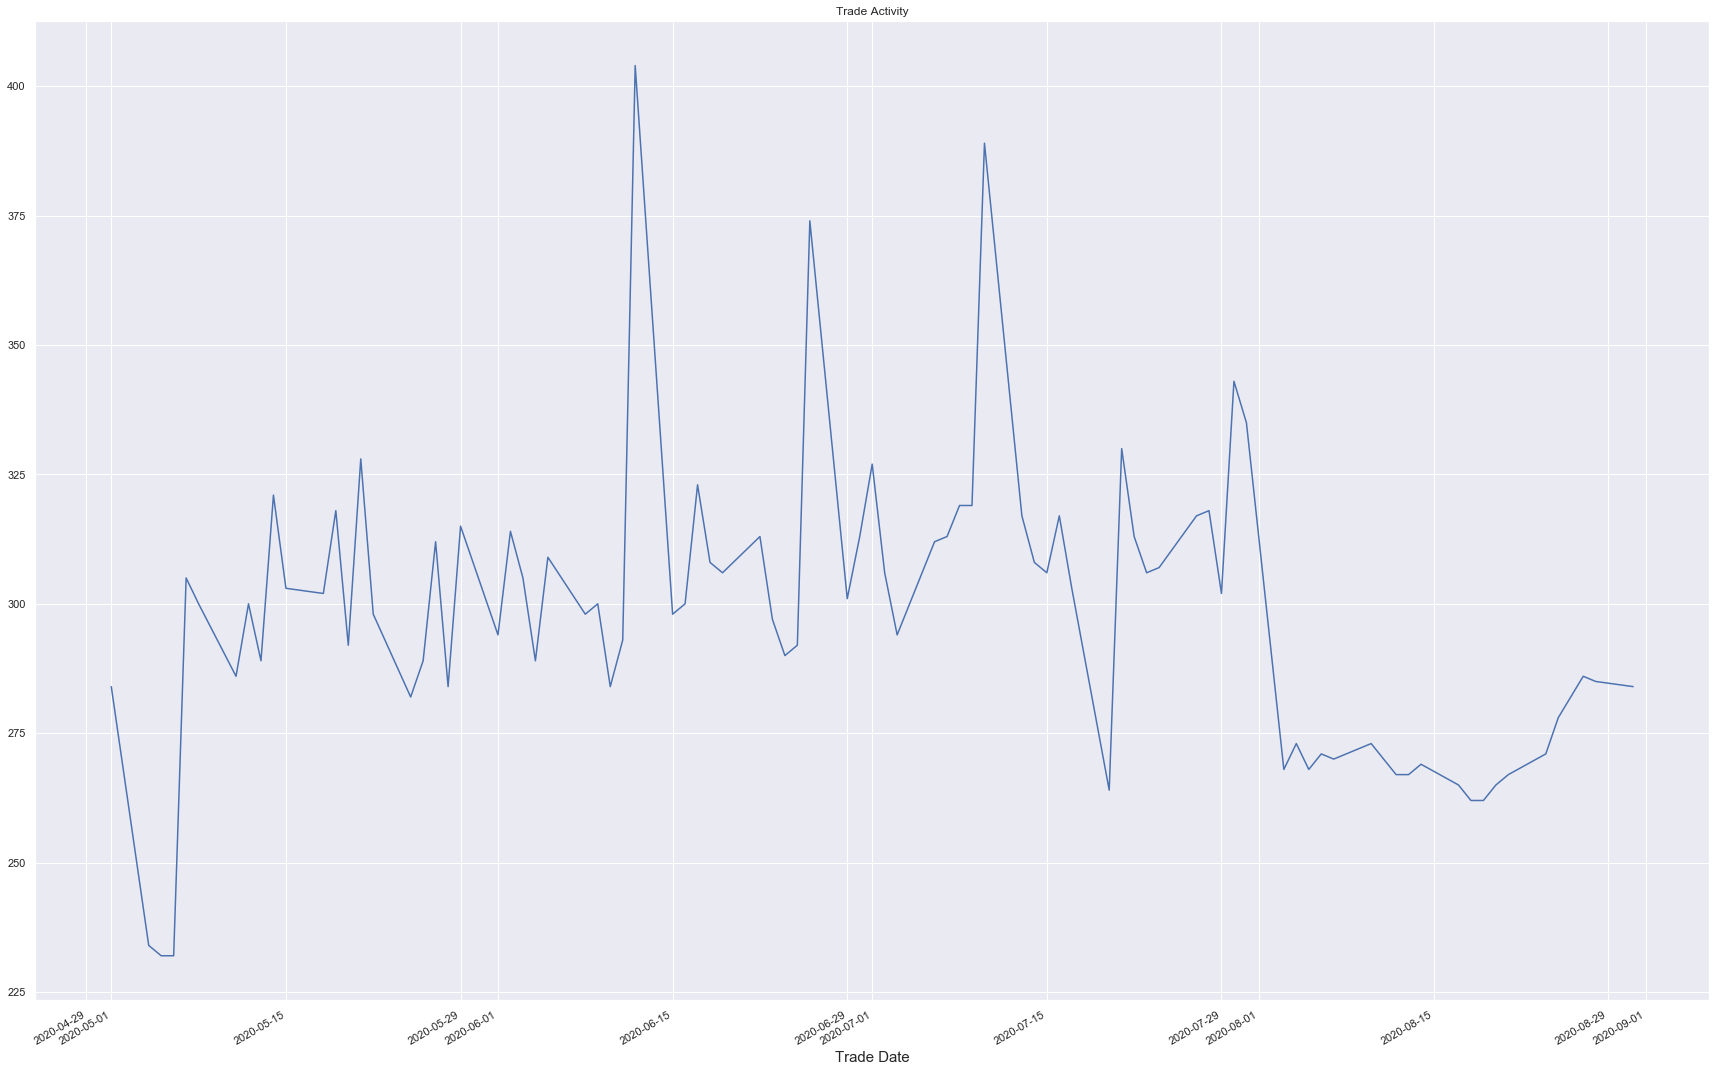

In [41]:
# Max and min trade activity
import seaborn as sns
sns.set(rc={'figure.figsize':(30,20)})
max_trds = positions_merged['Date'].value_counts().max()
min_trds = positions_merged['Date'].value_counts().min()
max_date = positions_merged['Date'].value_counts().idxmax()
min_date = positions_merged['Date'].value_counts().idxmin()

print("Highest trade activity count:{} occurs on {}".format(max_trds, max_date))
print("Lowest trade activity count:{} occurs on {}".format(min_trds, min_date))

activity_plt = positions_merged['Date'].value_counts().plot(title = 'Trade Activity')
activity_plt. set_xlabel('Trade Date', fontsize=15)

client_activity_table = positions_merged.set_index('Date')

# What potato price trends do you see?


Generally speaking you can use seasonality to help predict potato prices as it seems, there are times,

when the price increases drastically for the entire market (Jun/July) and it drops significantly in May.

Below you can view a plot for the weekly average potato prices across the sector.


Max Price of 1519.7 occurs on 2020-08-31 00:00:00
Min Price of 8.5 occurs on 2020-08-20 00:00:00


Text(0, 0.5, 'Price')

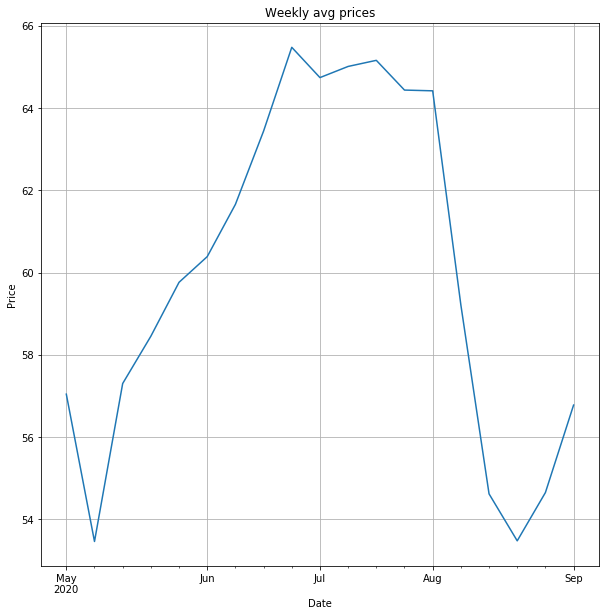

In [9]:
# Add a millisecond to each date to create a unique index. This allows us to turn the pricing data into a Timeseries
positions_merged['Date'] = positions_merged['Date'] + \
                            pd.to_timedelta(positions_merged.groupby('Date').cumcount(), unit='ms')
price_trends = positions.set_index('Date') # Overall market for poato trading

# Compute summary statistics
max_price = price_trends.Price.max()
min_price = price_trends.Price.min()
max_date = price_trends.Price.idxmax()
min_date = price_trends.Price.idxmin()

print("Max Price of {} occurs on {}".format(max_price, max_date))
print("Min Price of {} occurs on {}".format(min_price, min_date))

# Daily data is hard to draw a conlucsion on, weekly gives a better picture of the price movements for all potatoes.
weekly = price_trends['Price'].resample('W').mean()
weekly.plot(grid = True, figsize=(10,10),title='Weekly avg prices')
plt.ylabel("Price")

# Are there any factors that can help predict potato prices?

Yes the attributes of the potato can be used to help predict potato prices, although, not very well.
The highest correlation found is the colour of the skin. Which indicates this can be used to help predict
pricing using a learning algorithim.

The maturity of the potato is very good indicator of the price.
Potato prices have some of the highest prices, where the  maturiy is shorter.
Longer maturites tend to have a stable price.
We can further build on this by categorzing the maturities and computing the corrleation between the price.
This will help us assign weights to each maturity in order to compute the correlation
Because of time constratints I will leave the excercise for future enhancements.

Below I have the correlation matrix for the attributes of the potato.
I categorized the caolumns using the built-in method, this method is sometimes not efficient,
becuase the weights are arbitrary. This method provides a good estimate in understanding the data.

,Client ID,Product ID,Price,Variety Name,Country,Shape of tuber,Colour of skin,Colour of base of lightsprout,Height of plants,Frequency of berries
Client ID,1.000000,-0.074444,-0.003412,-0.075326,0.018168,0.031648,-0.040825,-0.027587,0.034261,-0.000672
Product ID,-0.074444,1.000000,0.036308,0.999431,0.134160,-0.100794,0.109408,0.108555,0.267695,-0.162083
Price,-0.003412,0.036308,1.000000,0.035340,-0.042057,-0.041551,0.164066,0.091351,0.031578,-0.121572
Variety Name,-0.075326,0.999431,0.035340,1.000000,0.136839,-0.096012,0.103298,0.105588,0.273255,-0.155670
Country,0.018168,0.134160,-0.042057,0.136839,1.000000,-0.065473,0.052011,0.058634,0.235765,0.217766
Shape of tuber,0.031648,-0.100794,-0.041551,-0.096012,-0.065473,1.000000,-0.040371,0.039825,-0.054195,0.045332
Colour of skin,-0.040825,0.109408,0.164066,0.103298,0.052011,-0.040371,1.000000,0.138018,0.107843,-0.218283
Colour of base of lightsprout,-0.027587,0.108555,0.091351,0.105588,0.058634,0.039825,0.138018,1.000000,-0.022613,-0.024054
Height of plants,0.034261,0.267695,0.031578,0.273255,0.235765,-0.054195,0.107843,-0.022613,1.000000,0.090708
Frequency of berries,-0.000672,-0.162083,-0.121572,-0.155670,0.217766,0.045332,-0.218283,-0.024054,0.090708,1.000000


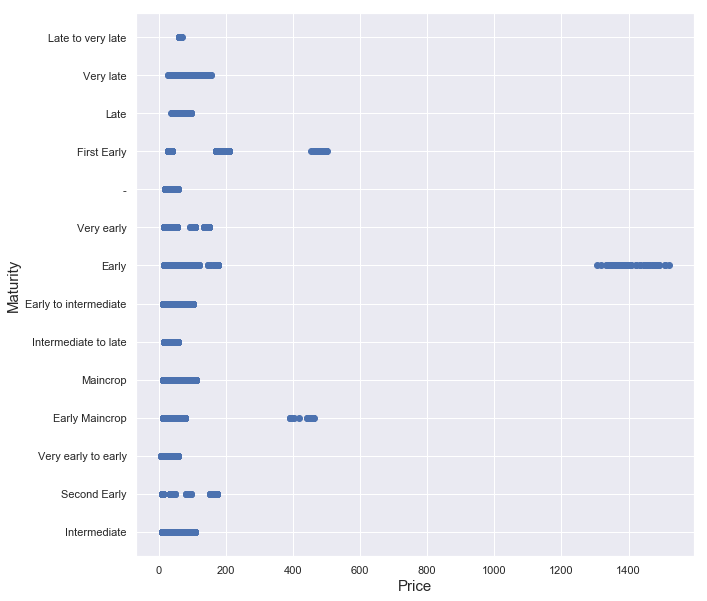

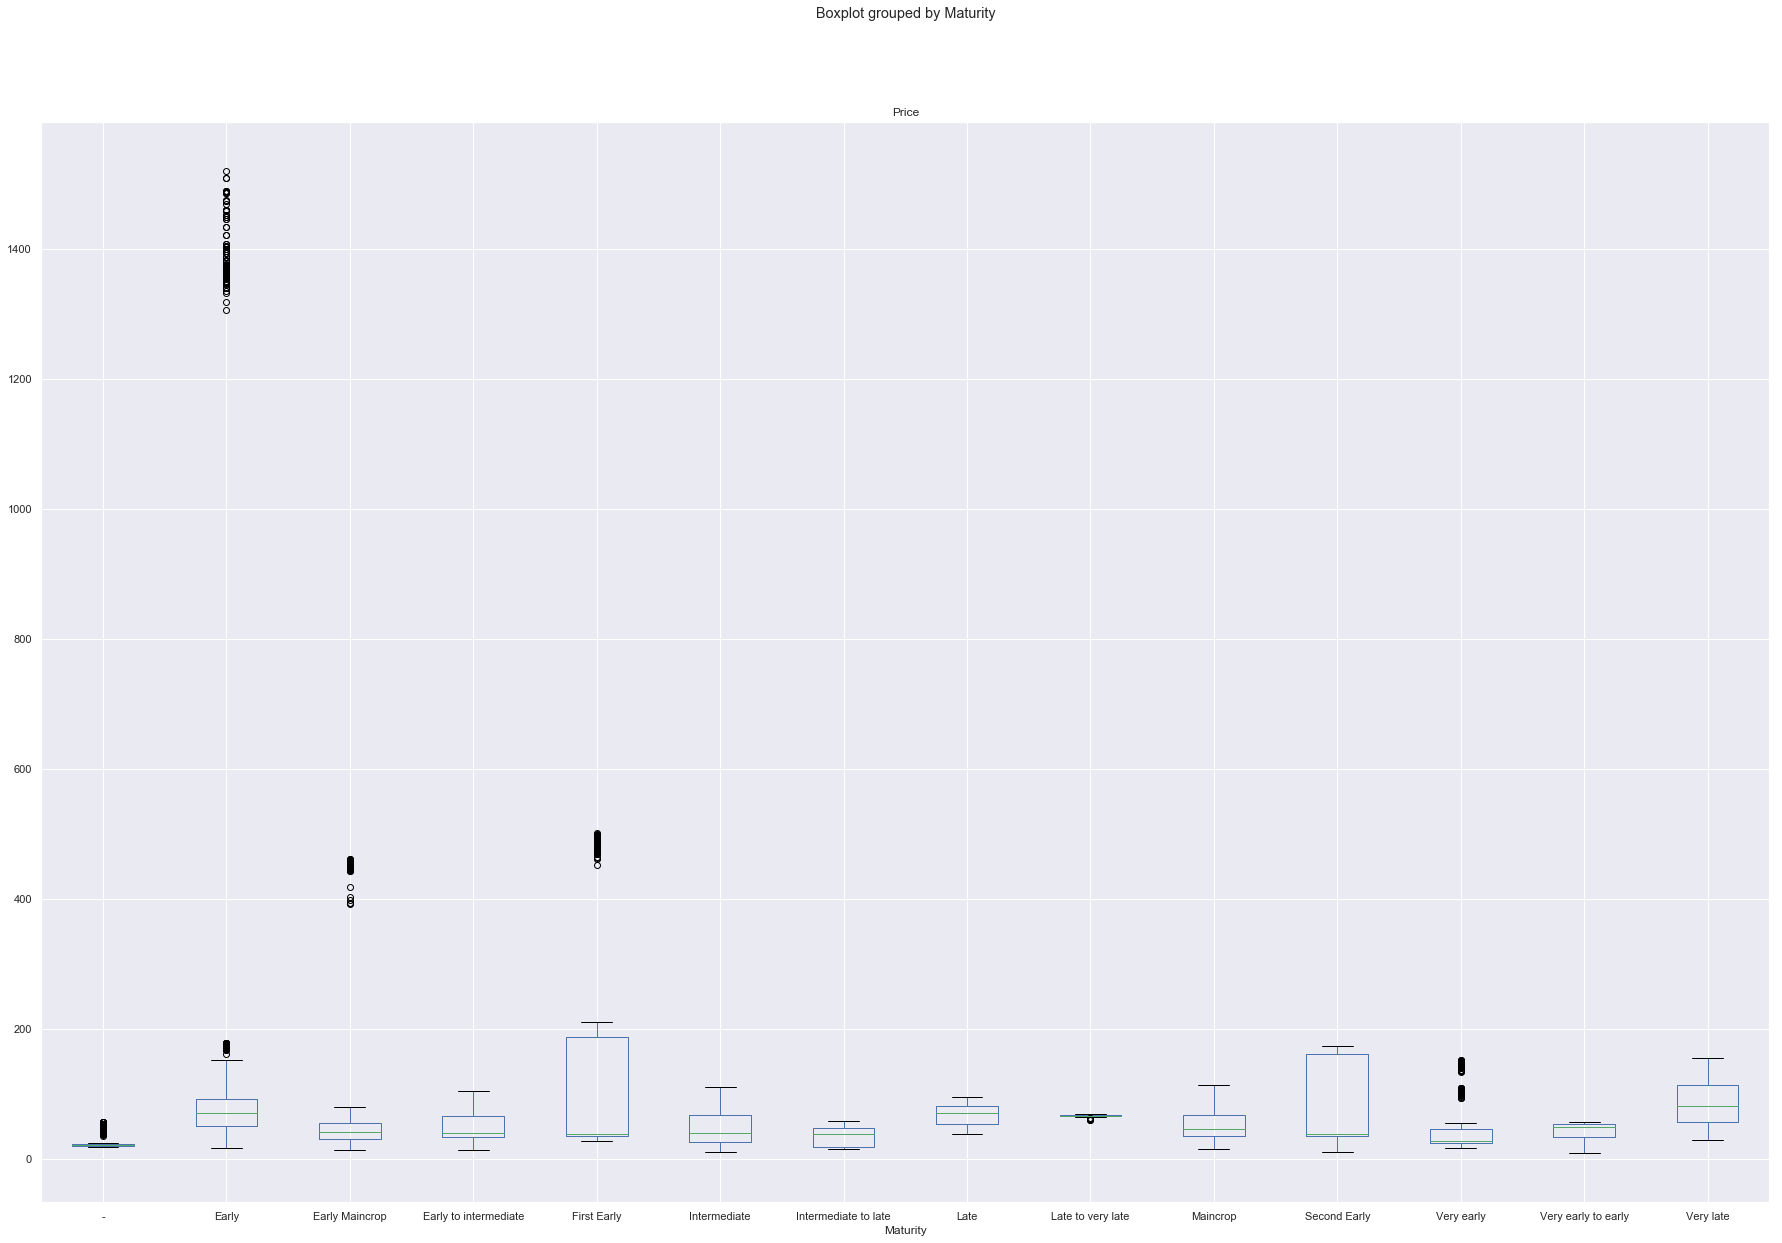

In [73]:
potato_prices = positions.merge(potato_info, on='Product ID')
plt.figure(figsize = (10,10))
plt.xlabel('Price', fontsize=15)
plt.ylabel('Maturity', fontsize=15)
plt.scatter(potato_prices['Price'], potato_prices['Maturity'])
sns.despine
potato_prices.boxplot('Price','Maturity')

categorize_prices = potato_prices.copy()
categorize_prices['Colour of skin']= categorize_prices['Colour of skin'].astype('category').cat.codes
categorize_prices['Country']= categorize_prices['Country'].astype('category').cat.codes
categorize_prices['Shape of tuber']= categorize_prices['Shape of tuber'].astype('category').cat.codes
categorize_prices['Colour of base of lightsprout']= categorize_prices['Colour of base of lightsprout'].astype('category').cat.codes
categorize_prices['Variety Name']= categorize_prices['Variety Name'].astype('category').cat.codes
categorize_prices['Colour of base of lightsprout']= categorize_prices['Depth of eyes'].astype('category').cat.codes
categorize_prices['Height of plants']= categorize_prices['Height of plants'].astype('category').cat.codes
categorize_prices['Frequency of berries']= categorize_prices['Frequency of berries'].astype('category').cat.codes
categorize_prices.corr()

# Are there any factors that can help predict client activity? 
 A good indicator for client activity is their region, with a dominant portion of traders coming from clients in the midwest.

 Another indicator for trading activity is the the industry where there is strong correlation between Industrial 
 clients and trading activity.
 
Attributes from the potatoes can also predict the client activity.
The most traded potato id can give a sense for future activity.

In [77]:
print(positions_merged.groupby(['Client Location',])['Date'].count().sort_values(ascending=False))
print(positions_merged.groupby(['Client Type',])['Date'].count().sort_values(ascending=False))
positions_merged.groupby(['Maturity'])['Date'].count().sort_values().head()
positions_merged.groupby(['Product ID'])['Date'].count().sort_values().head()

Client Location
Midwest      13142
Northeast     6743
North         4038
West          1956
Name: Date, dtype: int64
Client Type
Industrial     19652
Organic         2316
Hydroponitc     2238
Traditional     1673
Name: Date, dtype: int64


Product ID
20      9
284    12
6      13
280    23
130    25
Name: Date, dtype: int64

# Summarize what has happened during this period

During this period the activity and prices are their lowest in May and peak in June.

Summer months appear to be where the highest activity and prices occur for this product type.

The fact that activity and pricing is consistent is intitutive. One would reason, that as market interest
increases for a particular product, the price will be driven higher.

Potato prices movements are generally in line with each other, following similar trends and have a high correlation between product ids.

Client market control is heavily favored by clients coming from the Industrial sector in the Midwest region.
We can use this to help predict pricing as we know where the activity and potato pricing lies.

### We see majority of the market value is controlled by those located in the Midwest.

### The next largest is the Northeast but is pale in comparison,


Client Location
Midwest      231650623218.59
North           127527663.01
Northeast       764053837.21
West             95691518.80
Name: Market Value, dtype: object


Text(0, 0.5, 'Market Value')

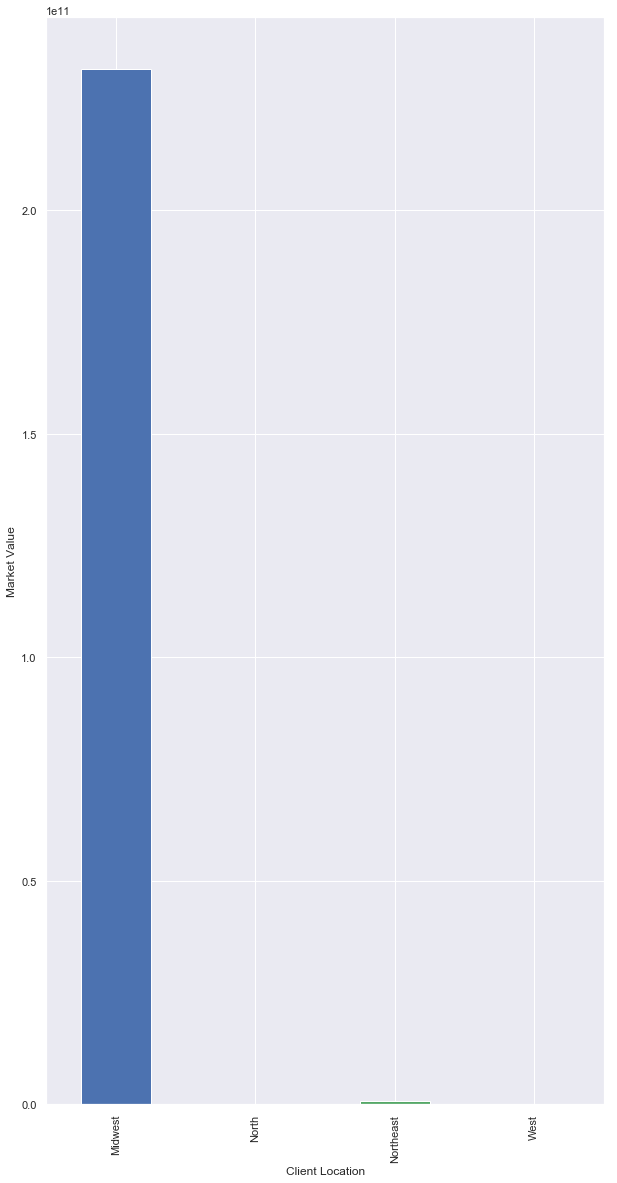

In [42]:
region_sum = positions_merged.groupby('Client Location')['Market Value'].sum()
print(region_sum.apply(lambda x: '{0:.2f}'.format(x)))


region_sum_plt = region_sum.plot(kind='bar',figsize=(10,20))
region_sum_plt.set_ylabel('Market Value')

### Majortiy of the market share is controlled by clients in the Industrial field

Client Type
Hydroponitc        54930213.16
Industrial     232056014860.38
Organic           441874498.27
Traditional        85076665.81
Name: Market Value, dtype: object


Text(0, 0.5, 'Market Value')

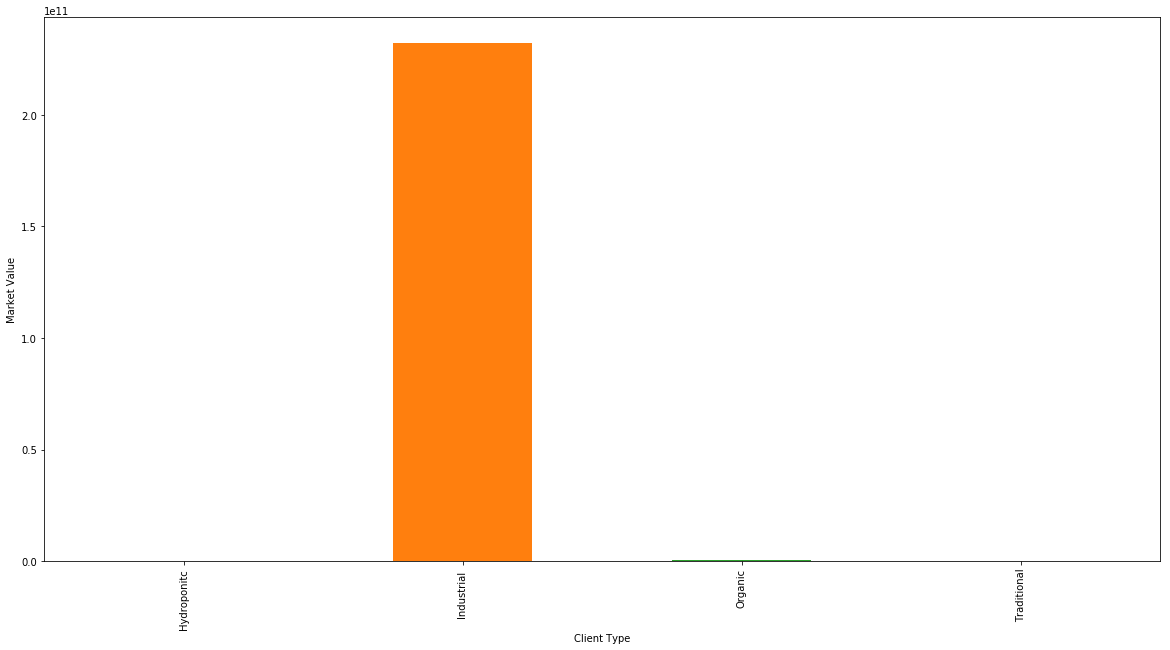

In [8]:
industry_sum = positions_merged.groupby('Client Type')['Market Value'].sum()
print(industry_sum.apply(lambda x: '{0:.2f}'.format(x)))
industry_sum.plot(kind='bar', figsize=(20,10))
plt.ylabel('Market Value')

Pricing between products are highly correlated and follow similar trend throughout this time period.

Text(0, 0.5, 'Price')

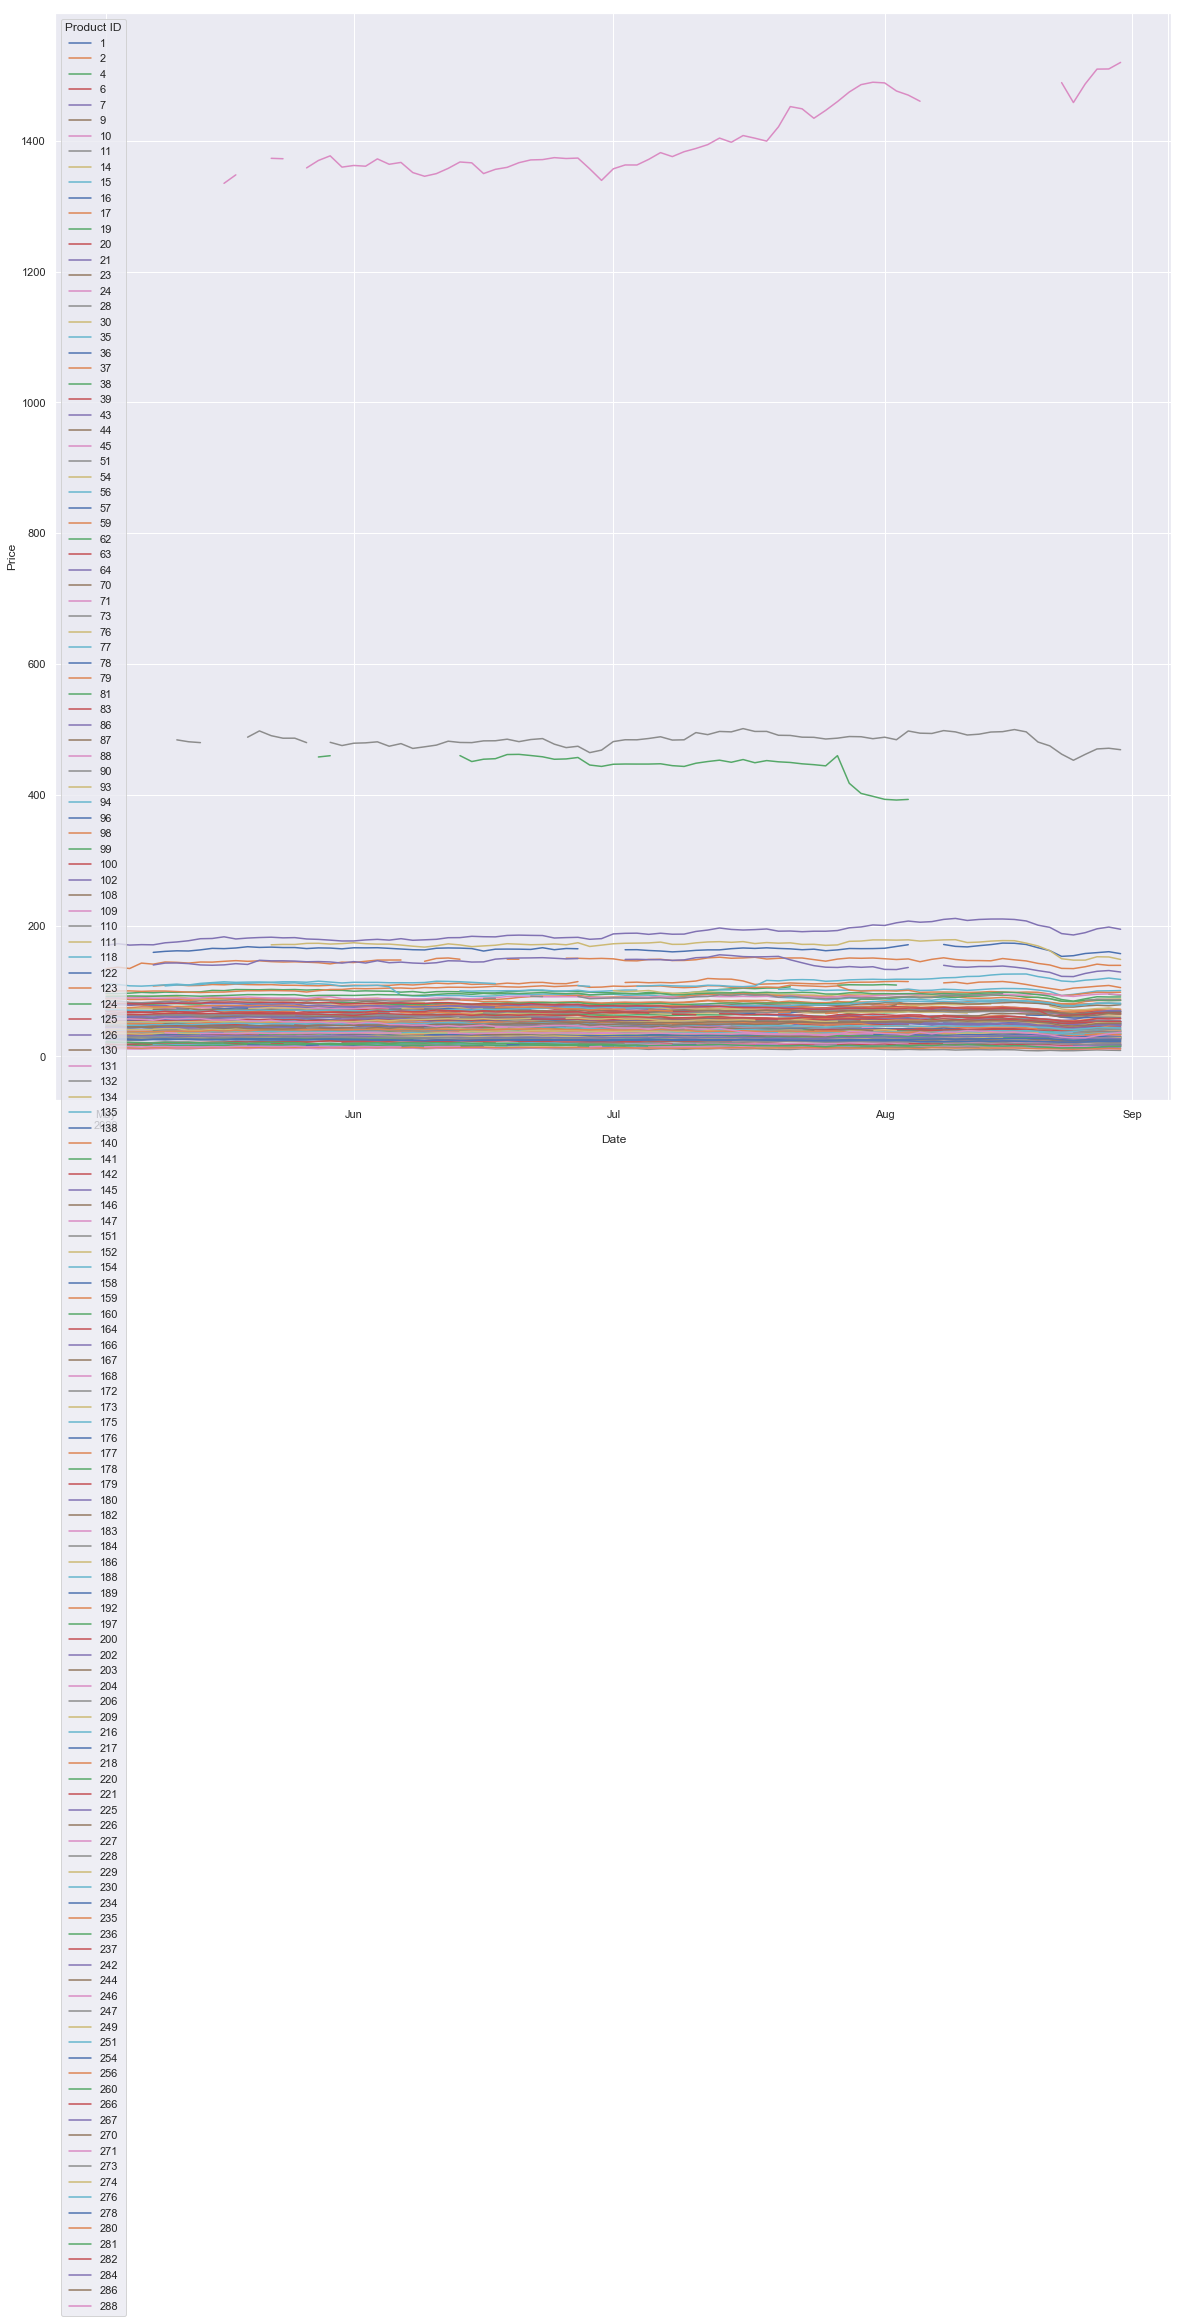

In [44]:
pivoted = pd.pivot_table(price_trends, values='Price', columns='Product ID', index='Date')
pivoted.idxmax(1).to_frame().T

pivoted.plot(grid = True, figsize=(20,20))
plt.ylabel("Price")
#print(pivoted.corr())

# Part 2

Part 2 
Background
Sales people and traders often receive storage prices offered by other storage companies. This information is valuable to know as it helps traders price storage within the potato market as there are no central mechanisms for price discovery within this market. However capturing this information is tricky as there is not a standard manner in which this information is disseminated. Word of mouth, conversations over the telephone, over Bloomberg chat, or over email are the ways in which price information can be passed. Additionally, when information is passed, the structure of the messages will not always be in a standard format and pieces of information can be missing. For example, one client can give you the number of potatoes being stored while another client may not. However, the fee and they type of potato will always be given.  
 
Questions
•	Design and draw a high level diagram of how you would go about building something that would help capture data from these various mediums.
•	How would you structure these data to make it useful for traders? 
•	What are potential uses of these data? 
•	Create a simple web app where sales people or traders can input the information that is passed to them
•	What other fields, optional or non-optional, would you add to the above?
![image.png](attachment:image.png)

To run this simple app do run below in cmd/terminal. Then open -> http://127.0.0.1:5000/
---> python case_study_part_2.py


In [ ]:
from flask import Flask, render_template, request
app = Flask(__name__)

# Landing page
@app.route("/")
def index():
    return render_template('index.html')

# Html files stored /templates
@app.route('/result', methods=['POST', 'GET']) # Results page
def result():
    if request.method == 'POST':
        result = request.form  # Input data from webpage        
        return render_template('result.html', result=result) 


# Todo add error handling and storage methods

if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [16/Feb/2019 06:28:00] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [16/Feb/2019 06:28:01] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [16/Feb/2019 06:28:15] "POST /result HTTP/1.1" 200 -
127.0.0.1 - - [16/Feb/2019 06:28:15] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [16/Feb/2019 06:30:44] "POST /result HTTP/1.1" 200 -
